In [1]:
import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings(action='ignore',category=DeprecationWarning)
warnings.filterwarnings(action='ignore',category=FutureWarning)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
df = pd.read_csv('https://raw.githubusercontent.com/Monk5088/College-project/master/heart.csv')
df.head(3)
df.info()
print('Number of rows in the dataset: ',df.shape[0])
print('Number of columns in the dataset: ',df.shape[1])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.2 KB
Number of rows in the dataset:  303
Number of columns in the dataset:  14


In [2]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [3]:
X= df.drop('target',axis=1)
y=df['target']
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.3,random_state=42)

In [15]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
knn =KNeighborsClassifier()
params = {'n_neighbors':list(range(1,20)),
    'p':[1, 2, 3, 4,5,6,7,8,9,10],
    'leaf_size':list(range(1,20)),
    'weights':['uniform', 'distance']
         }
model = GridSearchCV(knn,params,cv=3, n_jobs=-1)
model.fit(X_train,y_train)
predict = model.predict(X_test)

In [5]:
from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve
print('Accuracy Score: ',accuracy_score(y_test,predict))
print('Using k-NN we get an accuracy score of: ',
      round(accuracy_score(y_test,predict),5)*100,'%')
y_probabilities = model.predict_proba(X_test)[:,1]
false_positive_rate_knn,true_positive_rate_knn,threshold_knn = roc_curve(y_test,y_probabilities)

Accuracy Score:  0.7032967032967034
Using k-NN we get an accuracy score of:  70.33 %


In [6]:
from sklearn.linear_model import LogisticRegression
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)
classifier_log=LogisticRegression(random_state=0)
classifier_log.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=0, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [7]:
y_predict=classifier_log.predict(X_test)
from sklearn.metrics import accuracy_score,confusion_matrix

In [8]:
accuracy=accuracy_score(y_test,y_predict)
print('Accuracy Score: ',accuracy)
print('Using Logistic Regression we get an accuracy score of: ',
      round(accuracy,5)*100,'%')
log_probabilities=classifier_log.predict_proba(X_test)[:,1]
false_positive_rate_log,true_positive_rate_log,threshold_log = roc_curve(y_test,log_probabilities)

Accuracy Score:  0.8021978021978022
Using Logistic Regression we get an accuracy score of:  80.22 %


In [16]:
import sys
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_train = pd.DataFrame(X_train_scaled)
X_test_scaled = scaler.transform(X_test)
X_test = pd.DataFrame(X_test_scaled)

In [14]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
dtree= DecisionTreeClassifier(random_state=7)
#Setting parameters for GridSearchCV
params = {'max_features': ['auto', 'sqrt', 'log2'],
          'min_samples_split': [2,3,4,5,6,7,8,9,10,11,12,13,14,15], 
          'min_samples_leaf':[1,2,3,4,5,6,7,8,9,10,11]}
tree_model = GridSearchCV(dtree, param_grid=params, n_jobs=-1)
tree_model.fit(X_train,y_train)
predict = tree_model.predict(X_test)

In [17]:
tree_model.fit(X_train,y_train)
import warnings
from sklearn.metrics import accuracy_score
print('Accuracy Score: ',accuracy_score(y_test,predict))
print('Using Decision Tree we get an accuracy score of: ',round(accuracy_score(y_test,predict),5)*100,'%')

Accuracy Score:  0.8131868131868132
Using Decision Tree we get an accuracy score of:  81.319 %


In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
import keras
from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.


In [19]:
from sklearn.metrics import roc_auc_score,roc_curve
#Get predicted probabilites
target_probailities_tree = tree_model.predict_proba(X_test)[:,1]
#Create true and false positive rates
tree_false_positive_rate,tree_true_positive_rate,tree_threshold = roc_curve(y_test,target_probailities_tree)
roc_auc_score(y_test,target_probailities_tree)


0.5408496732026145

In [20]:
df = pd.read_csv('https://raw.githubusercontent.com/Monk5088/College-project/master/heart.csv')

In [21]:
chest_pain=pd.get_dummies(df['cp'],prefix='cp',drop_first=True)
df=pd.concat([df,chest_pain],axis=1)
df.drop(['cp'],axis=1,inplace=True)
sp=pd.get_dummies(df['slope'],prefix='slope')
th=pd.get_dummies(df['thal'],prefix='thal')
rest_ecg=pd.get_dummies(df['restecg'],prefix='restecg')
frames=[df,sp,th,rest_ecg]
df=pd.concat(frames,axis=1)
df.drop(['slope','thal','restecg'],axis=1,inplace=True)

In [22]:
X = df.drop(['target'], axis = 1)
y = df.target.values

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [25]:
warnings.filterwarnings(action='ignore',category=UserWarning)
classifier = Sequential()

# Adding the input layer and the first hidden layer
classifier.add(Dense(output_dim = 11, init = 'uniform', activation = 'relu', input_dim = 22))

# Adding the second hidden layer
classifier.add(Dense(output_dim = 11, init = 'uniform', activation = 'relu'))

# Adding the output layer
classifier.add(Dense(output_dim = 1, init = 'uniform', activation = 'sigmoid'))

# Compiling the ANN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [26]:
classifier.fit(X_train, y_train, batch_size = 10, nb_epoch = 100)

Epoch 1/100
242/242 [==============================] - 0s 2ms/step - loss: 0.6922 - acc: 0.5413
Epoch 2/100
242/242 [==============================] - 0s 194us/step - loss: 0.6908 - acc: 0.5413
Epoch 3/100
242/242 [==============================] - 0s 156us/step - loss: 0.6886 - acc: 0.5413
Epoch 4/100
242/242 [==============================] - 0s 194us/step - loss: 0.6869 - acc: 0.5413
Epoch 5/100
242/242 [==============================] - 0s 285us/step - loss: 0.6856 - acc: 0.5413
Epoch 6/100
242/242 [==============================] - 0s 194us/step - loss: 0.6802 - acc: 0.5413
Epoch 7/100
242/242 [==============================] - 0s 271us/step - loss: 0.6732 - acc: 0.5950
Epoch 8/100
242/242 [==============================] - 0s 186us/step - loss: 0.6657 - acc: 0.6157
Epoch 9/100
242/242 [==============================] - 0s 186us/step - loss: 0.6476 - acc: 0.6364
Epoch 10/100
242/242 [==============================] - 0s 198us/step - loss: 0.6270 - acc: 0.6901
Epoch 11/100
242/242 

242/242 [==============================] - 0s 194us/step - loss: 0.3540 - acc: 0.8430
Epoch 84/100
242/242 [==============================] - 0s 156us/step - loss: 0.3761 - acc: 0.8430
Epoch 85/100
242/242 [==============================] - 0s 194us/step - loss: 0.3534 - acc: 0.8471
Epoch 86/100
242/242 [==============================] - 0s 129us/step - loss: 0.3666 - acc: 0.8430
Epoch 87/100
242/242 [==============================] - 0s 156us/step - loss: 0.3500 - acc: 0.8595
Epoch 88/100
242/242 [==============================] - 0s 194us/step - loss: 0.3652 - acc: 0.8388
Epoch 89/100
242/242 [==============================] - 0s 156us/step - loss: 0.3595 - acc: 0.8471
Epoch 90/100
242/242 [==============================] - 0s 194us/step - loss: 0.3788 - acc: 0.8512
Epoch 91/100
242/242 [==============================] - 0s 207us/step - loss: 0.3519 - acc: 0.8678
Epoch 92/100
242/242 [==============================] - 0s 178us/step - loss: 0.3629 - acc: 0.8471
Epoch 93/100
242/242 [=

In [27]:
y_pred = classifier.predict(X_test)
#import seaborn as sns
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred.round())
#sns.heatmap(cm,annot=True,cmap="Oranges",fmt="d",cbar=False)
#accuracy score
from sklearn.metrics import accuracy_score
ac=accuracy_score(y_test, y_pred.round())
print('accuracy of the model: ',ac*100)
ac=ac*100
from sklearn.metrics import confusion_matrix,accuracy_score, roc_curve, auc
false_positive_rate_neural, recall,true_positive_rate_neural = roc_curve( y_test, y_pred)
roc_auc = auc(false_positive_rate_neural, recall,true_positive_rate_neural)

accuracy of the model:  83.60655737704919


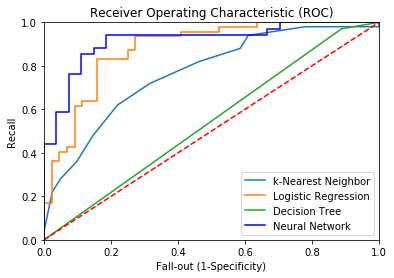

In [34]:
false_positive_rate_neural, recall, true_positive_rate_neural = roc_curve( y_test, y_pred)
roc_auc = auc(false_positive_rate_neural, recall)
#plt.figure()
#plt.figure(figsize=(23,19))
plt.title('Receiver Operating Characteristic (ROC)')
#plt.title('Reciver Operating Characterstic Curve')
plt.plot(false_positive_rate_knn,true_positive_rate_knn,label='k-Nearest Neighbor')
plt.plot(false_positive_rate_log,true_positive_rate_log,label='Logistic Regression')
plt.plot(tree_false_positive_rate,tree_true_positive_rate,label='Decision Tree')
#plt.plot(false_positive_rate_neural,true_positive_rate_neural,label='Neural Network')
plt.plot(false_positive_rate_neural, recall, 'b', label = 'Neural Network' %roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1], [0,1], 'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.ylabel('Recall')
plt.xlabel('Fall-out (1-Specificity)')
plt.show()